In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def EulerODE(t, x0, f):
    """
    Solves an ordinary differential equation using the Euler method.

    Args:
        t (np.ndarray): Array of time points (1xT).
        x0 (np.ndarray): Array of initial conditions (Nx1).
        f (callable): Function handle representing the ODE, f(x) returns the derivative of x.

    Returns:
        np.ndarray: Array of the solution x with size [N, T].
    """
    T = len(t)
    N = len(x0)
    x = np.zeros((N, T))
    x[:, 0] = x0

    for i in range(T - 1):
        h = t[i + 1] - t[i]
        x[:, i + 1] = x[:, i] + h * f(x[:, i])
    return x



In [3]:
if __name__ == '__main__':
    # SimulateFiringRateModel.m equivalent in Python

    # Define the parameters of the firing rate model
    tau = 10  # Time constant (ms)
    r_inf = 50  # Maximum firing rate (Hz)
    theta = 20  # Threshold (arbitrary units)
    I_ext = 25  # External input (arbitrary units)

    # Define the ODE function
    def firing_rate_ode(r):
        return (-r + r_inf / (1 + np.exp(-(I_ext - theta) / 5))) / tau


In [5]:
    # Define the time span and initial condition
    t_start = 0
    t_end = 100
    h = 1  # Time step (ms) - You can vary this
    t = np.arange(t_start, t_end + h, h)
    r0 = np.array([0])  # Initial firing rate



In [6]:
    # Solve using the Euler method
    r_euler = EulerODE(t, r0, firing_rate_ode)


In [7]:
    # Exact solution (for comparison)
    t_exact = np.linspace(t_start, t_end, 1000)
    r_inf_val = r_inf / (1 + np.exp(-(I_ext - theta) / 5))
    r_exact = r_inf_val + (r0[0] - r_inf_val) * np.exp(-t_exact / tau)

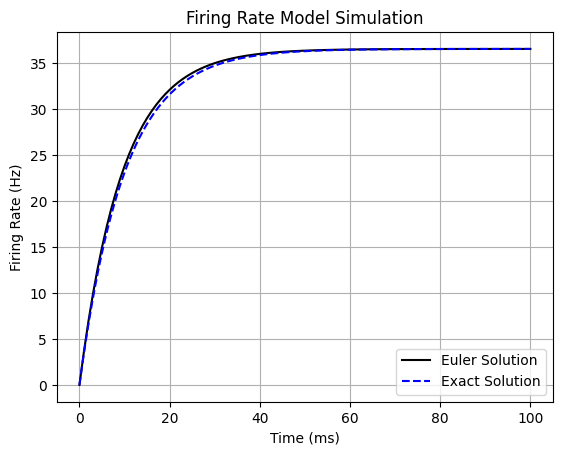

In [8]:
    # Plot the results
    plt.figure()
    plt.plot(t, r_euler[0, :], 'k-', label='Euler Solution')
    plt.plot(t_exact, r_exact, 'b--', label='Exact Solution')
    plt.xlabel('Time (ms)')
    plt.ylabel('Firing Rate (Hz)')
    plt.title('Firing Rate Model Simulation')
    plt.legend()
    plt.grid(True)
    plt.show()


Exploring the effect of time step:


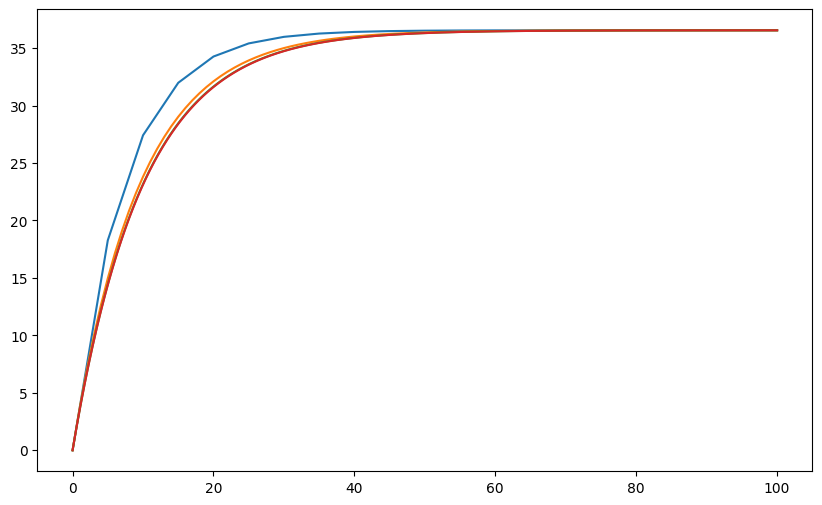

In [9]:
    # --- Exploring the effect of time step ---
    print("\nExploring the effect of time step:")
    time_steps = [5, 1, 0.1, 0.01]
    plt.figure(figsize=(10, 6))
    for h_test in time_steps:
        t_test = np.arange(t_start, t_end + h_test, h_test)
        r_euler_test = EulerODE(t_test, r0, firing_rate_ode)
        plt.plot(t_test, r_euler_test[0, :], label=f'Euler (h={h_test})')


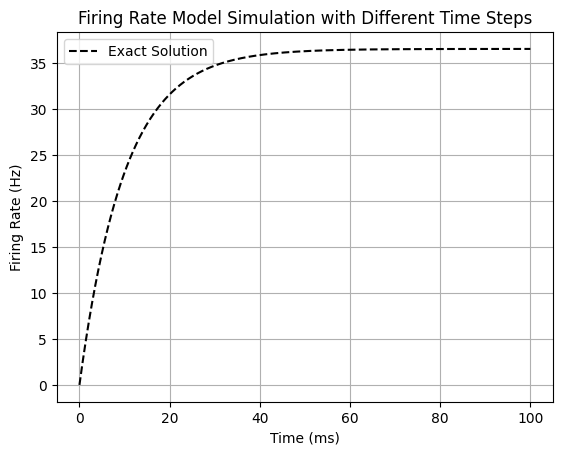

In [10]:
    plt.plot(t_exact, r_exact, 'k--', label='Exact Solution')
    plt.xlabel('Time (ms)')
    plt.ylabel('Firing Rate (Hz)')
    plt.title('Firing Rate Model Simulation with Different Time Steps')
    plt.legend()
    plt.grid(True)
    plt.show()

In [11]:
    print("\nObservations on time step:")
    print("Smaller time steps (smaller h) generally lead to a more accurate Euler solution that better approximates the real solution.")
    print("However, smaller time steps require more iterations to cover the same time span.")
    print("This increased number of iterations leads to:")
    print("- Longer computation time.")
    print("- Potentially larger accumulation of floating-point errors, although this might not be immediately obvious in this simple example.")



Observations on time step:
Smaller time steps (smaller h) generally lead to a more accurate Euler solution that better approximates the real solution.
However, smaller time steps require more iterations to cover the same time span.
This increased number of iterations leads to:
- Longer computation time.
- Potentially larger accumulation of floating-point errors, although this might not be immediately obvious in this simple example.
